In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
#import api_key
from config import api_key

In [3]:
#from citipy import citipy
from citipy import citipy
temp = 'imperial'
url='http://api.openweathermap.org/data/2.5/weather?'

In [4]:
output_data ='Output/weather.csv'

In [5]:
#one call to get the variable names for the for loop
#city = 'albany'
query_url = f'{url}appid={api_key}&units={temp}&q='
#response=requests.get(querl_url).json()
#response

In [6]:
#range of lat and long
lat = (-90,90)
long = (-180,180)

In [7]:
lat_longs = []
cities = []

lats = np.random.uniform(lat[0],lat[1],size=1500)
longs = np.random.uniform(long[0],long[1],size=1500)
lat_longs = zip(lats, longs)

for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

603

In [8]:
cities

['dzhusaly',
 'yellowknife',
 'talawdi',
 'attawapiskat',
 'nome',
 'port alfred',
 'jamestown',
 'hithadhoo',
 'cerritos',
 'dikson',
 'cape town',
 'hobart',
 'port elizabeth',
 'lakes entrance',
 'tay ninh',
 'coihaique',
 'buta',
 'north myrtle beach',
 'mahebourg',
 'mataura',
 'rikitea',
 'luderitz',
 'harper',
 'barentsburg',
 'debrecen',
 'bhuban',
 'okha',
 'busselton',
 'ribeira grande',
 'illoqqortoormiut',
 'ancud',
 'grand river south east',
 'umzimvubu',
 'saint anthony',
 'puerto ayora',
 'tobermory',
 'teguldet',
 'chuy',
 'taburi',
 'ludvika',
 'bethel',
 'ampanihy',
 'torbay',
 'emerald',
 'kapaa',
 'poum',
 'cidreira',
 'hilo',
 'albany',
 'visby',
 'ushuaia',
 'barrow',
 'turtas',
 'flin flon',
 'klaksvik',
 'severo-kurilsk',
 'la ronge',
 'samana',
 'lata',
 'tazovskiy',
 'taolanaro',
 'vaini',
 'bathsheba',
 'saint george',
 'alofi',
 'rabat',
 'yambio',
 'codrington',
 'praya',
 'saldanha',
 'tabou',
 'manggar',
 'hasaki',
 'ilulissat',
 'hermanus',
 'punta arena

In [9]:
#may need to add this time.sleep(50) inorder to not get blocked by weather api
cities_two = []
cloudiness = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
country = []

#count quantities to make sure group not over 5
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url+city).json()
        cloudiness.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        if count_one >48:
            count_one =1
            set_one+=1
            cities_two.append(city)
        else:
            count_one +=1
            cities_two.append(city)
        print(f'{count_one} of {set_one}|{city}')
    except:
        print('Not found')


Not found
1 of 1|yellowknife
Not found
Not found
2 of 1|nome
3 of 1|port alfred
4 of 1|jamestown
5 of 1|hithadhoo
6 of 1|cerritos
7 of 1|dikson
8 of 1|cape town
9 of 1|hobart
10 of 1|port elizabeth
11 of 1|lakes entrance
12 of 1|tay ninh
13 of 1|coihaique
14 of 1|buta
15 of 1|north myrtle beach
16 of 1|mahebourg
17 of 1|mataura
18 of 1|rikitea
19 of 1|luderitz
20 of 1|harper
Not found
21 of 1|debrecen
22 of 1|bhuban
23 of 1|okha
24 of 1|busselton
25 of 1|ribeira grande
Not found
26 of 1|ancud
Not found
Not found
27 of 1|saint anthony
28 of 1|puerto ayora
29 of 1|tobermory
30 of 1|teguldet
31 of 1|chuy
Not found
32 of 1|ludvika
33 of 1|bethel
34 of 1|ampanihy
35 of 1|torbay
36 of 1|emerald
37 of 1|kapaa
38 of 1|poum
39 of 1|cidreira
40 of 1|hilo
41 of 1|albany
42 of 1|visby
43 of 1|ushuaia
44 of 1|barrow
45 of 1|turtas
46 of 1|flin flon
47 of 1|klaksvik
48 of 1|severo-kurilsk
49 of 1|la ronge
1 of 2|samana
2 of 2|lata
3 of 2|tazovskiy
Not found
4 of 2|vaini
5 of 2|bathsheba
6 of 2|saint

12 of 10|sao felix do xingu
13 of 10|pa sang
14 of 10|sur
15 of 10|victor harbor
16 of 10|faya
17 of 10|tonekabon
18 of 10|angoche
19 of 10|san-pedro
20 of 10|san policarpo
21 of 10|veraval
22 of 10|ginda
23 of 10|ronne
24 of 10|aksarka
25 of 10|wakkanai
26 of 10|manzhouli
27 of 10|russell
28 of 10|arlit
29 of 10|mantua
30 of 10|jvari
31 of 10|oktyabrskiy
32 of 10|madison
33 of 10|belaya gora
34 of 10|havre-saint-pierre
35 of 10|moranbah
36 of 10|nizhniy chir
37 of 10|severnyy
38 of 10|sosua
39 of 10|mandalgovi
40 of 10|cockburn town
41 of 10|margate
42 of 10|alta floresta
43 of 10|lavrentiya
44 of 10|eidsvoll
Not found
45 of 10|tahe
46 of 10|salekhard
47 of 10|sorland
48 of 10|santo angelo
49 of 10|huambo
Not found
1 of 11|oktyabrskoye
2 of 11|port blair
3 of 11|chaumont
4 of 11|san carlos de bariloche
5 of 11|talnakh
6 of 11|taoudenni
7 of 11|craigieburn
8 of 11|motema
9 of 11|kiama
10 of 11|tambura
11 of 11|brewster
12 of 11|kiunga
13 of 11|maragogi
14 of 11|silikatnyy
15 of 11|poso

In [10]:
#datacheck
len(cities_two)

544

In [11]:
#datacheck
len(cloudiness)

544

In [12]:
#datacheck
len(dates)

544

In [13]:
#create dictionary and then pd.dataframe
weather_dic={'City':cities_two,'Lat':lats,'Lng':lngs,'Max Temp':max_temps,'Humidity':humidity,
            'Cloudiness':cloudiness,'Wind Speeds':wind_speeds,'Country':country,'Date':dates}
weather =pd.DataFrame(weather_dic)
weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speeds,Country,Date
0,yellowknife,62.46,-114.35,18.00,96,100,8.41,CA,1604066148
1,nome,64.50,-165.41,10.40,85,90,4.12,US,1604065921
2,port alfred,-33.59,26.89,63.46,53,96,9.62,ZA,1604066148
3,jamestown,42.10,-79.24,37.00,93,90,9.17,US,1604066148
4,hithadhoo,-0.60,73.08,83.08,76,0,11.68,MV,1604065869


In [14]:
weather.to_csv(output_data)

In [15]:
#data check to make sure all date for each city was added and some descriptive stats
weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speeds,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,18.529485,22.352739,60.190129,70.875000,53.091912,8.605809,1.604066e+09
std,33.387787,91.115221,23.661910,22.195577,39.987692,5.821986,9.037875e+01
min,-54.800000,-175.200000,-16.600000,9.000000,0.000000,0.810000,1.604066e+09
25%,-8.862500,-60.222500,45.142500,60.000000,5.000000,4.140000,1.604066e+09
50%,20.880000,22.840000,64.990000,76.000000,63.000000,6.945000,1.604066e+09
75%,46.790000,104.400000,78.757500,88.000000,92.000000,11.882500,1.604066e+09
max,78.220000,179.320000,102.600000,100.000000,100.000000,34.720000,1.604066e+09


In [64]:
#list indices...
#weather.index('Humidity')

In [17]:
#not cities with humidity over 100
weather.loc[weather['Humidity']>100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speeds,Country,Date


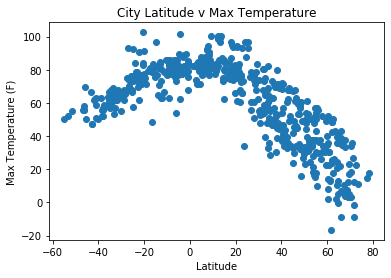

In [19]:
#scatter plot latitude vs temperatur plot
plt.scatter(weather['Lat'], weather['Max Temp'])
plt.title('City Latitude v Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

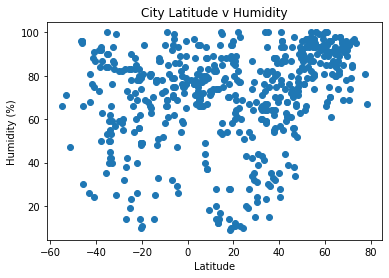

In [20]:
#scatter latitude vs humidity plot
plt.scatter(weather['Lat'], weather['Humidity'])
plt.title('City Latitude v Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

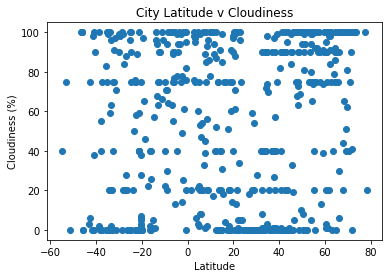

In [22]:
#scatter latitude vs. cloudiness plot
plt.scatter(weather['Lat'],weather['Cloudiness'])
plt.title('City Latitude v Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

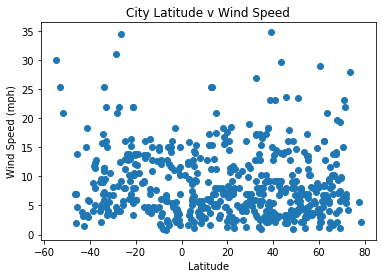

In [23]:
#scatter latitude vs. wind speed plot
plt.scatter(weather['Lat'],weather['Wind Speeds'])
plt.title('City Latitude v Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [27]:
weather.dtypes

City            object
Lat            float64
Lng            float64
Max Temp       float64
Humidity         int64
Cloudiness       int64
Wind Speeds    float64
Country         object
Date             int64
dtype: object

In [26]:
north = weather.loc(weather['Lat'])
south = weather.loc(weather['Lat'])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
#linear regression Northern Hemisphere -Max temp vs Latitude
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
#stays
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#linear regression southern hemisphere -max temp vs latitude
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#linear regression northern hemisphere humidity vs latitude
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#linear regression southern hemisphere humidity vs latitude
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#linear regression northern hemisphere cloudiness vs latitude
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#linear regression southern hemisphere cloudiness vs latitude
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#linear regression northern hemisphere wind speed vs latitude
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#linear regression southern hemisphere wind speed vs latitude
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Average Tumer Volume v Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()